In [ ]:
import numpy as np
import re
import pandas as pd
from datetime import time
from matplotlib import pyplot as plt

def E2_40sec_data():
  txt = open("H276_092.dat",'r').readlines()
  parameter = re.split('          |\n',txt[0])
  del parameter[len(parameter)-1]

  data = pd.DataFrame(columns=parameter)

  for i in np.arange(1,len(txt),1):
    A = txt[i]
    value = re.split(' |\n',A)
    value = list(filter(None, value))
    data.loc[i-1] = value
  return data

def E3_6sec_data():
  txt = open("h276092.asc",'r').readlines()
  parameter = ['helios_number','year','day','hour','minute','second',\
               'data_number','B_xse','B_yse','B_zse','B']
  data = pd.DataFrame(columns=parameter)

  for i in np.arange(0,len(txt),1):
    helios_number = txt[i][0:2].strip()
    year = txt[i][2:4].strip()
    day = txt[i][4:7].strip()
    hour = txt[i][7:9].strip()
    minute = txt[i][9:11].strip()
    second = txt[i][11:13].strip()
    data_number = txt[i][13:15].strip()
    B_xse = txt[i][17:22].strip()
    B_yse = txt[i][22:29].strip()
    B_zse = txt[i][29:36].strip()
    B = txt[i][36:43].strip()

    value = [helios_number,year,day,hour,minute,second,data_number,B_xse,B_yse,B_zse,B]

    data.loc[i] = value
    
  return data

In [ ]:
data_E2 = E2_40sec_data()
data_E2 = data_E2.apply(pd.to_numeric)

data_E3 = E3_6sec_data()
data_E3 = data_E3.apply(pd.to_numeric)

In [ ]:
time_list = []
for i in range(0,len(data_E2['hour'])):
  t = time(round(float(data_E2['hour'][i])),round(float(data_E2['min'][i])),\
           round(float(data_E2['sec'][i])))
  time_list.append(t)

time_range = pd.date_range("1976-4-1 00:00:00", "1976-4-2 00:00:00",freq="2H")
time_range = time_range.map(lambda x: x.strftime('%H:%M:%S'))

In [ ]:
bx_data = data_E2['Bx']
by_data = data_E2['By']
bz_data = data_E2['Bz']

br_data = data_E3['B_xse']
bt_data = data_E3['B_yse']
bn_data = data_E3['B_zse']


E2_dechr = data_E2['dechr']

E3_dechr = data_E3['hour'] + data_E3['minute'] / 60 + data_E3['second'] / 3600
data_E3['dechr'] = E3_dechr

b_data = np.sqrt(bx_data**2 + by_data**2 + bz_data **2)

b_data1 = np.sqrt(br_data**2 + bt_data ** 2 + bn_data ** 2)

Text(0.5, 1.0, '1976-04-01(E2)')

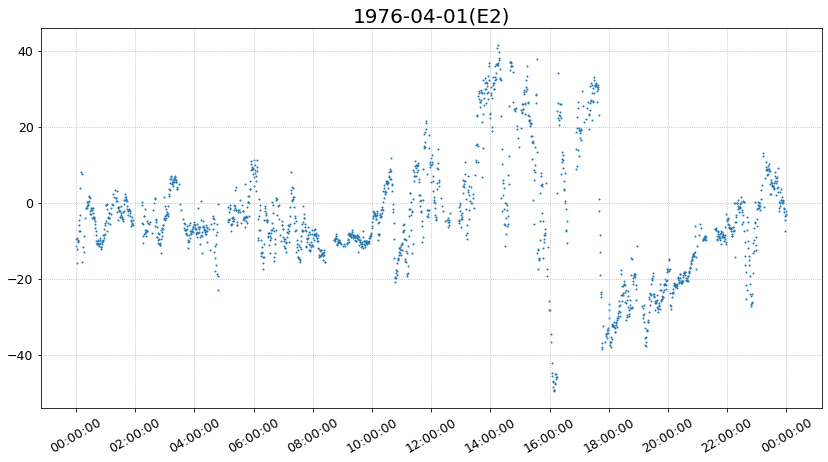

In [ ]:
plt.figure(figsize=(14,7))
plt.scatter(E2_dechr,by_data,s=1)
plt.grid(linestyle=':')
plt.xticks(np.arange(0,24 +1,2),time_range,fontsize=12.5,rotation=30)
plt.yticks(fontsize=12.5)
plt.title('1976-04-01(E2)',fontsize=20)

Text(0.5, 1.0, '1976-04-01')

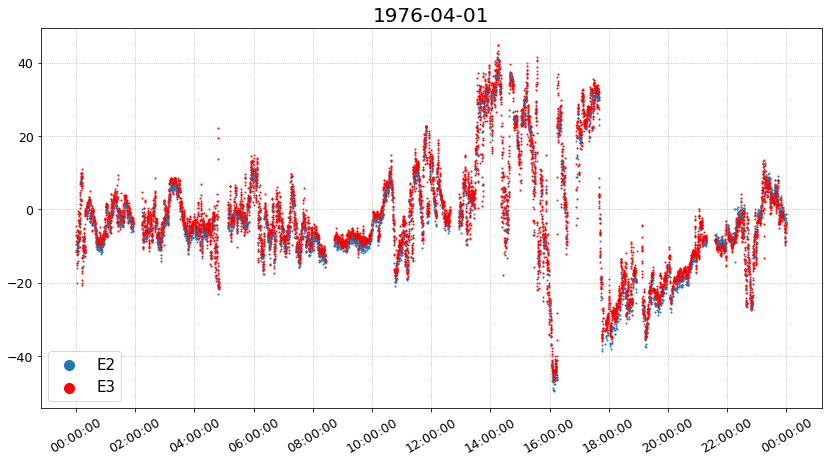

In [ ]:
plt.close()

plt.figure(figsize=(14,7))
plt.scatter(E2_dechr,by_data,s=1,label="E2",zorder=1)
plt.scatter(E3_dechr,bt_data,s=1,color='red',label="E3",zorder=0)
plt.grid(linestyle=':')
plt.xticks(np.arange(0,24 +1,2),time_range,fontsize=12.5,rotation=30)
plt.yticks(fontsize=12.5)
lgnd = plt.legend(loc='lower left',fontsize=15)
lgnd.legendHandles[0]._sizes = [100] ; lgnd.legendHandles[1]._sizes = [100]
plt.title('1976-04-01',fontsize=20)

Text(0, 0.5, 'E3_Data')

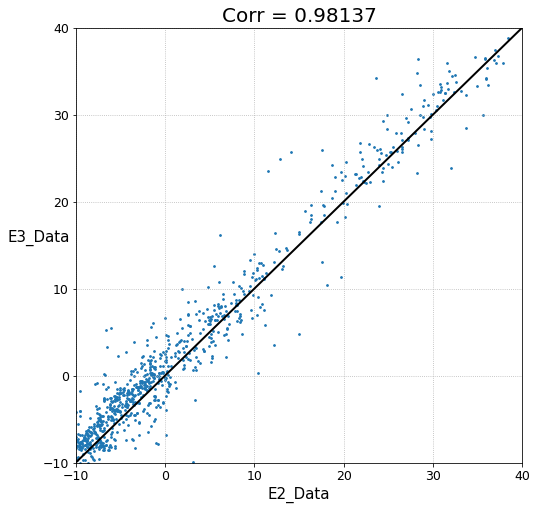

In [ ]:
plt.close()
from scipy.interpolate import Rbf
import scipy.stats as stats
from matplotlib import colors

ex_x = np.linspace(min(E2_dechr),max(E3_dechr),1200,endpoint=True)
ex_interp1 = Rbf(E2_dechr,by_data)
ex_value1 = ex_interp1(ex_x)
ex_interp2 = Rbf(E3_dechr,bt_data)
ex_value2 = ex_interp2(ex_x)

corr = stats.pearsonr(ex_value1,ex_value2)

plt.figure(figsize=(8,8))
plt.scatter(ex_value1,ex_value2,s=3)
plt.xlim(-10,40) ; plt.ylim(-10,40)
plt.plot([-10,40],[-10,40],linewidth=2,color="black")

plt.title("Corr = "+str(round(corr[0],5)),fontsize=20)
plt.grid(linestyle=':')
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.xlabel("E2_Data",fontsize=15) ; plt.ylabel("E3_Data",fontsize=15,rotation=0)

Text(0, 0.5, 'E3_Data')

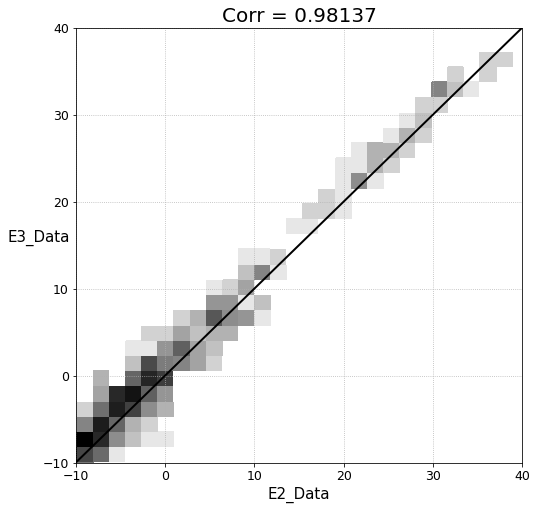

In [ ]:
plt.figure(figsize=(8,8))
h, xedge, yedge, _ = plt.hist2d(ex_value1,ex_value2,bins=50,norm=colors.LogNorm(),cmap=plt.cm.Greys)
#plt.scatter(ex_value1,ex_value2,s=0.5,color="black")
plt.xlim(-10,40) ; plt.ylim(-10,40)
plt.plot([-10,40],[-10,40],linewidth=2,color="black")

plt.title("Corr = "+str(round(corr[0],5)),fontsize=20)
plt.grid(linestyle=':')
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.xlabel("E2_Data",fontsize=15) ; plt.ylabel("E3_Data",fontsize=15,rotation=0)

In [ ]:
plt.close()
from sklearn.svm import SVR

E2_x = np.arange(min(E2_dechr),max(E2_dechr) +1/90,1/90)
E2_interv = ex_interp1(E2_x)

E3_x = np.arange(min(E3_dechr),max(E3_dechr) +1/600,1/600)
E3_interv = ex_interp2(E3_x)

svm_reg_E2 = SVR(C=100,gamma=100,epsilon=0.01) # 계수값 변경
svm_reg_E2.fit(np.array(E2_x).reshape(-1,1),np.array(E2_interv).reshape(-1,1))

reg_E2 = svm_reg_E2.predict(np.array(E2_x).reshape(-1,1))

svm_reg_E3 = SVR(C=100,gamma=100,epsilon=0.01) # 계수값 변경
svm_reg_E3.fit(np.array(E3_x).reshape(-1,1),np.array(E3_interv).reshape(-1,1))

reg_E3 = svm_reg_E3.predict(np.array(E3_x).reshape(-1,1))

fig, ax = plt.subplots(2,1,sharex=True,figsize=(16,16))
ax[0].scatter(E2_x,E2_interv,color='blue',zorder=1,s=1)
ax[0].scatter(E2_dechr,by_data,s=1,color='grey',zorder=2)
ax[0].plot(E2_x,reg_E2,color="black",linewidth=1,zorder=3)
ax[0].grid(linestyle=':')
ax[0].set_title("E2(40sec)",fontsize=15)

ax[1].scatter(E3_x,E3_interv,color='red',zorder=1,s=1)
ax[1].scatter(E3_dechr,bt_data,zorder=2,color='grey',s=1)
ax[1].plot(E3_x,reg_E3,color="black",linewidth=1,zorder=3)
ax[1].grid(linestyle=':')
ax[1].set_title("E3(6sec)",fontsize=15)

plt.setp(ax,xticks = np.arange(0,24 +1,2), xticklabels= time_range)

ax[0].tick_params(axis='both', which='major', labelsize=12.5)
ax[1].tick_params(axis='both', which='major', labelsize=12.5)

ax[1].tick_params(axis="x",labelrotation=30)

In [ ]:
from scipy.linalg import toeplitz as toep

def centered_finite_diff(N,h): #centered
  line = np.zeros(N)
  line[1] = 2/3 ; line[N-1] = -2/3 ; line[2] = -1/12 ; line[N-2] = 1/12

  matrix = 1/h * toep(-line,line)

  return matrix

def forward_finite_diff(N,h): #forward
  line = np.zeros(N)
  line[0] = -25/12 ; line[1] = 4 ; line[2] = -3 ; line[3] = 4/3 ; line[4] = -1/4
  
  line2 = np.zeros(N)
  line2[0] = -25/12 ; line2[N-1] = 4 ; line2[N-2] = -3 ; line2[N-3] = 4/3 ; line2[N-4] = -1/4

  matrix = 1/h * toep(line2,line)

  return matrix

def backward_finite_diff(N,h): #backward
  line = np.zeros(N)
  line[0] = 25/12 ; line[1] = -4 ; line[2] = 3 ; line[3] = -4/3 ; line[4] = 1/4
  
  line2 = np.zeros(N)
  line2[0] = 25/12 ; line2[N-1] = -4 ; line2[N-2] = 3 ; line2[N-3] = -4/3 ; line2[N-4] = 1/4

  matrix = 1/h * toep(line,line2)

  return matrix

In [ ]:
plt.close()

N = len(E2_x)
h = 1/90

A = centered_finite_diff(N,h)
B = forward_finite_diff(N,h)
C = backward_finite_diff(N,h)

L = np.zeros_like(A)
L[0] = B[0] ; L[1] = B[1]
L[N-1] = C[N-1] ; L[N-2] = C[N-2]
L[2:N-2] = A[2:N-2]

E2_app = np.dot(L,reg_E2)

N2 = len(E3_x)
h2 = 1/600

A1 = centered_finite_diff(N2,h2)
B1 = forward_finite_diff(N2,h2)
C1 = backward_finite_diff(N2,h2)

L1 = np.zeros_like(A1)
L1[0] = B1[0] ; L1[1] = B1[1]
L1[N2-1] = C1[N2-1] ; L1[N2-2] = C1[N2-2]
L1[2:N2-2] = A1[2:N2-2]

E3_app = np.dot(L1,reg_E3)

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(E2_x,E2_app,color='blue',zorder=2,label="E2_app")
plt.plot(E3_x,E3_app,color="red",zorder=1,label="E3_app")
plt.ylim(-600,600)
plt.grid(linestyle=':')
plt.xticks(np.arange(0,24 +1,2),time_range,fontsize=12.5,rotation=30) ; plt.yticks(fontsize=12.5)
plt.title("Approximate value(E2 & E3)",fontsize=20)
plt.legend(fontsize=15)

In [ ]:
plt.close()

plt.figure(figsize=(8,8))

interval = Rbf(E2_x,E2_app)
value_E2 = interval(E3_x)

corr1 = stats.pearsonr(value_E2,E3_app)

h1, xedges1, yedges1, _ = plt.hist2d(value_E2,E3_app,bins=100,cmap=plt.cm.Greys,norm=colors.LogNorm(),cmin=5)

plt.close()

h1 = np.nan_to_num(h1,copy=False)

new_h = []
for i in range(len(h1)):
    bins_value = h1[i] / h1.sum()
    new_h.append(bins_value)

X,Y = np.meshgrid(xedges1,yedges1)
new_h = list(zip(*new_h))[::1]

plt.figure(figsize=(8,8))
plt.pcolormesh(X,Y,new_h,norm=colors.LogNorm(),cmap=plt.cm.Greys)
plt.plot([-200,200],[-200,200],linewidth=3,color='black')
plt.grid(linestyle=':')
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.title("Corr = "+str(round(corr1[0],5)),fontsize=15)
plt.xlim(-200,200) ; plt.ylim(-200,200)